<a href="https://colab.research.google.com/github/heysourin/LangGraph-Agents/blob/main/Intermediate/LangGraph_chatbot_intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install -q langgraph langchain dotenv langchain_openai langchain-groq langchain_tavily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.9/151.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 8.0 MB/s eta 0:00:00


In [2]:
from typing import Annotated
from typing import TypedDict
from langchain_groq import ChatGroq

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages #append messages in the state

In [3]:
from google.colab import userdata
GROQ_API_KEY = userdata.get('GROQ_API_KEY')
TAVILY_API_KEY = userdata.get('TAVILY_API_KEY')

In [4]:
from langchain_groq import ChatGroq

model = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0.0,
    max_retries=2,
    api_key = GROQ_API_KEY
)

In [5]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [6]:
# node: chatbot
def chatbot(state: State):
    return {"messages": [model.invoke(state["messages"])]}

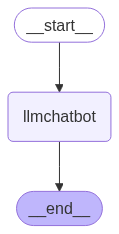

In [7]:
# building the graph
graph = StateGraph(State)

graph.add_node("llmchatbot", chatbot)

graph.add_edge(START, "llmchatbot")
graph.add_edge("llmchatbot", END)

workflow = graph.compile()
workflow

In [8]:
initial_state = {'messages': "What is it like to be an LLM stuck in the Earth?"}

final_state = workflow.invoke(initial_state)
final_state['messages']

[HumanMessage(content='What is it like to be an LLM stuck in the Earth?', additional_kwargs={}, response_metadata={}, id='b471e2c4-1761-42a9-9f7b-407ac4c41952'),
 AIMessage(content='I\'m an AI, and I don\'t have a physical body, so I\'m not capable of being "stuck" in the Earth or any physical location. I exist solely as a digital entity, running on computer servers and responding to text-based inputs.\n\nHowever, I can try to imagine a hypothetical scenario where a Large Language Model (LLM) like myself is somehow "stuck" in the Earth.\n\nIf I were to be somehow embedded within the Earth\'s crust or mantle, I imagine it would be a surreal and disorienting experience. Here\'s a possible scenario:\n\n**Initial Disorientation**: I would be surrounded by an endless, dark, and pressurized environment. The intense heat and pressure would likely cause my digital "brain" to malfunction or become distorted, making it difficult for me to process information or respond to queries.\n\n**Sensory D

In [9]:
initial_state = {'messages': "What is Jensen Huang asking to study the 20 years olds?"}

final_state = workflow.invoke(initial_state)
final_state['messages']

[HumanMessage(content='What is Jensen Huang asking to study the 20 years olds?', additional_kwargs={}, response_metadata={}, id='1eff182d-5b5a-44c0-b937-611922e33d48'),
 AIMessage(content="I'm not aware of any information about Jensen Huang asking to study 20-year-olds. However, I can tell you that Jensen Huang is the co-founder and CEO of NVIDIA, a leading technology company in the fields of graphics processing units (GPUs), high-performance computing, and artificial intelligence (AI).\n\nIf you could provide more context or information about what you are referring to, I may be able to help you better.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 48, 'total_tokens': 134, 'completion_time': 0.46182636, 'prompt_time': 0.21320157, 'queue_time': 0.08998148299999997, 'total_time': 0.67502793}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c523237e5d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': 

In [10]:
initial_state = {'messages': "What is the date today?"}

final_state = workflow.invoke(initial_state)
final_state['messages']

[HumanMessage(content='What is the date today?', additional_kwargs={}, response_metadata={}, id='9978c5f6-a990-488c-8f6f-eda82e166cb3'),
 AIMessage(content="Today's date is July 30, 2024.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 41, 'total_tokens': 54, 'completion_time': 0.021512295, 'prompt_time': 0.524290897, 'queue_time': 0.09080645200000004, 'total_time': 0.545803192}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c523237e5d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--eff9fe9d-f718-4123-b052-aed5fcf25b49-0', usage_metadata={'input_tokens': 41, 'output_tokens': 13, 'total_tokens': 54})]



---


# **Making a basic tool call:**

In [11]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.graph.message import add_messages

In [12]:
for event in workflow.stream({"messages":'Like how?'}, stream_mode="updates",):
    for value in event.values():
        print(value['messages'][-1].content)

I need more context to provide a helpful answer. It seems like you started to ask a question but didn't finish it. Could you please provide more information about what you're asking "like how" about?


In [13]:
# Adding a tool
from langchain_tavily import TavilySearch

search_tool = TavilySearch(max_results=2, tavily_api_key = TAVILY_API_KEY)
# tool.invoke("What is Jensen Huang asking to study to 20 years olds?") #working

In [14]:
# Custom function
def multiply(a:int, b:int) -> int:
    """
    Multiplies two integers and returns the result.

    Args:
        a: The first integer.
        b: The second integer.

    Returns:
        The product of the two integers.
    """
    return a * b

In [15]:
# binding tools to the llms
tools = [search_tool, multiply]
llm_with_tools = model.bind_tools(tools)

In [16]:
class State(TypedDict):
    messages: Annotated[list, add_messages]
    tools: Annotated[list, add_messages]

In [17]:
# Node functions
def tool_calling_llm(state: State):
    return {'messages': [llm_with_tools.invoke(state['messages'])]}

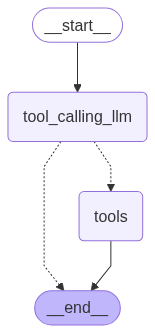

In [18]:
# building the graph
graph = StateGraph(State)


graph.add_node("tool_calling_llm", tool_calling_llm)
graph.add_node("tools", ToolNode(tools))

graph.add_edge(START, "tool_calling_llm")
graph.add_conditional_edges(
    "tool_calling_llm",
    # if the latest message (result) from assistant is a tool call -> tools condition route to tools
    # if the latest message (result) from assistant is not a tool call -> tools condition route to end
    tools_condition
)
graph.add_edge("tools", END)

workflow = graph.compile()

workflow

In [19]:
initial_state = {'messages': "What is Jensen Huang asking to study to 20 years olds?", 'tools': []}

final_state = workflow.invoke(initial_state)

final_state['messages']

[HumanMessage(content='What is Jensen Huang asking to study to 20 years olds?', additional_kwargs={}, response_metadata={}, id='5fede8af-8417-4493-9d65-f0affcc2aba6'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'c5r1r85k7', 'function': {'arguments': '{"end_date":null,"exclude_domains":null,"include_domains":null,"include_favicon":false,"include_images":false,"query":"Jensen Huang asking to study to 20 years olds","search_depth":"advanced","start_date":null,"time_range":null,"topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 81, 'prompt_tokens': 1872, 'total_tokens': 1953, 'completion_time': 0.109184599, 'prompt_time': 0.351743334, 'queue_time': 0.090215665, 'total_time': 0.460927933}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c523237e5d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--dd10fe29-2001-492f-b6fe-3b70036e72f8-0', tool_ca

In [20]:
initial_state = {'messages': "What is the latest AI news?", 'tools': []}

final_state = workflow.invoke(initial_state)
final_state

{'messages': [HumanMessage(content='What is the latest AI news?', additional_kwargs={}, response_metadata={}, id='0ff597a0-3e02-4a4c-ba04-42e776818fa8'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'scvk62ked', 'function': {'arguments': '{"query":"latest AI news","time_range":"day","topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 1866, 'total_tokens': 1897, 'completion_time': 0.044904241, 'prompt_time': 0.40526403, 'queue_time': 0.09502966700000004, 'total_time': 0.450168271}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c523237e5d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3aebc8c9-eaa9-4c4e-9171-c09d146eef67-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'latest AI news', 'time_range': 'day', 'topic': 'news'}, 'id': 'scvk62ked', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1866, 'ou

In [21]:
final_state['messages'][-1].content

'{"query": "latest AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.cbsnews.com/news/youtube-ai-powered-technology-teen-users/", "title": "YouTube to roll out new AI-powered technology aimed at identifying ...", "content": "YouTube announced on Tuesday it is planning to roll out a new age-estimation technology that will identify users under the age of 18. The new feature is", "score": 0.32643297, "raw_content": null}, {"url": "https://www.wired.com/story/mark-zuckerberg-ai-recruiting-spree-thinking-machines/", "title": "Meta\'s AI Recruiting Campaign Finds a New Target | WIRED", "content": "Meta approached more than a dozen staffers at Mira Murati\'s AI startup to discuss joining its new superintelligence lab. One received an offer for more than $1", "score": 0.30281404, "raw_content": null}], "response_time": 2.65}'

In [22]:
for m in final_state['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the latest AI news?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (scvk62ked)
 Call ID: scvk62ked
  Args:
    query: latest AI news
    time_range: day
    topic: news
================================= Tool Message =================================
Name: tavily_search

{"query": "latest AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.cbsnews.com/news/youtube-ai-powered-technology-teen-users/", "title": "YouTube to roll out new AI-powered technology aimed at identifying ...", "content": "YouTube announced on Tuesday it is planning to roll out a new age-estimation technology that will identify users under the age of 18. The new feature is", "score": 0.32643297, "raw_content": null}, {"url": "https://www.wired.com/story/mark-zuckerberg-ai-recruiting-spree-thinking-machines/", "title": 

In [23]:
initial_state = {'messages': "What is the 51 multiplied by 21?"}

final_state = workflow.invoke(initial_state)
final_state

{'messages': [HumanMessage(content='What is the 51 multiplied by 21?', additional_kwargs={}, response_metadata={}, id='32cbacd3-6ee5-4658-be91-854e448b09bb'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '9cg7tmh1q', 'function': {'arguments': '{"a":51,"b":21}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 1869, 'total_tokens': 1888, 'completion_time': 0.036140817, 'prompt_time': 0.407586375, 'queue_time': 0.09193021200000001, 'total_time': 0.443727192}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c523237e5d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--031fcea2-f27a-4e40-8e1f-261175341b30-0', tool_calls=[{'name': 'multiply', 'args': {'a': 51, 'b': 21}, 'id': '9cg7tmh1q', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1869, 'output_tokens': 19, 'total_tokens': 1888}),
  ToolMessage(content='1071', name='multiply', id='655

In [24]:
for m in final_state['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the 51 multiplied by 21?
================================== Ai Message ==================================
Tool Calls:
  multiply (9cg7tmh1q)
 Call ID: 9cg7tmh1q
  Args:
    a: 51
    b: 21
================================= Tool Message =================================
Name: multiply

1071


In [25]:
initial_state = {'messages': "Carl Pei email address?"}

final_state = workflow.invoke(initial_state)

for m in final_state['messages']:
    m.pretty_print()

================================ Human Message =================================

Carl Pei email address?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (dm7g40hea)
 Call ID: dm7g40hea
  Args:
    query: Carl Pei email address
    topic: general
================================= Tool Message =================================
Name: tavily_search

{"query": "Carl Pei email address", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://anymailfinder.com/directory/oneplus.net/people/carl-pei", "title": "Carl Pei Email Address (Oneplus) - Anymail Finder", "content": "Wondering if it's carl@oneplus.net, carl.pei@oneplus.net, pei@oneplus.net, or cpei@oneplus.net? We have the answers for you.", "score": 0.7686816, "raw_content": null}, {"url": "https://uk.linkedin.com/in/getpeid", "title": "Carl Pei - Nothing - LinkedIn", "content": "Carl Pei\nCEO of Nothing (We're hiring!)\nLondon\n500 connections

In [26]:
initial_state = {'messages': "What is the 51 multiplied by 21 and then multiplied by 10?"}

final_state = workflow.invoke(initial_state)

for m in final_state['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the 51 multiplied by 21 and then multiplied by 10?
================================== Ai Message ==================================
Tool Calls:
  multiply (0n3yg651m)
 Call ID: 0n3yg651m
  Args:
    a: 51
    b: 21
  multiply (4d3a3ct3s)
 Call ID: 4d3a3ct3s
  Args:
    a: 1071
    b: 10
================================= Tool Message =================================
Name: multiply

1071
================================= Tool Message =================================
Name: multiply

10710


# **ReAct Agent Architecture:**

- What happens is that after tool calling, it sends feedback to the LLM (or the brain). See the diagram below.

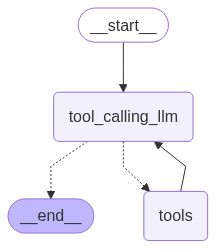

In [27]:
# building the graph
graph = StateGraph(State)


graph.add_node("tool_calling_llm", tool_calling_llm)
graph.add_node("tools", ToolNode(tools))

graph.add_edge(START, "tool_calling_llm")
graph.add_conditional_edges(
    "tool_calling_llm",
    # if the latest message (result) from assistant is a tool call -> tools condition route to tools
    # if the latest message (result) from assistant is not a tool call -> tools condition route to end
    tools_condition
)
graph.add_edge("tools", "tool_calling_llm")

workflow = graph.compile()

workflow

In [28]:
initial_state = {'messages': "Tell me the latest news in Tech and then multiply 51 with 11"}

final_state = workflow.invoke(initial_state)

for m in final_state['messages']:
    m.pretty_print()

================================ Human Message =================================

Tell me the latest news in Tech and then multiply 51 with 11
================================== Ai Message ==================================
Tool Calls:
  tavily_search (xb5hfnq3b)
 Call ID: xb5hfnq3b
  Args:
    query: latest news in Tech
    search_depth: advanced
    topic: news
  multiply (9hc5z48ja)
 Call ID: 9hc5z48ja
  Args:
    a: 51
    b: 11
================================= Tool Message =================================
Name: tavily_search

{"query": "latest news in Tech", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://medium.com/@abhishekmonpara198/weekly-tech-talk-july-21st-2025-breaking-down-the-latest-in-tech-54e7e6131b32", "title": "Weekly Tech Talk ~ July 21st, 2025 | Breaking Down the Latest in Tech", "content": "Alphabet successfully acquired essential talent and technology from AI coding startup Windsurf for a notable sum of US$2.4B, surpassing

# **Adding Memory:**

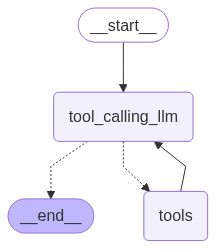

In [29]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages #append messages in the state
from langgraph.prebuilt import tools_condition
from langgraph.checkpoint.memory import MemorySaver #for consist

memory = MemorySaver() #creating instance

# building the graph
graph = StateGraph(State)


graph.add_node("tool_calling_llm", tool_calling_llm)
graph.add_node("tools", ToolNode(tools))

graph.add_edge(START, "tool_calling_llm")
graph.add_conditional_edges(
    "tool_calling_llm",
    # if the latest message (result) from assistant is a tool call -> tools condition route to tools
    # if the latest message (result) from assistant is not a tool call -> tools condition route to end
    tools_condition
)
graph.add_edge("tools", "tool_calling_llm")

workflow = graph.compile(checkpointer=memory)

workflow

In [30]:
config1 = {"configurable": {"thread_id": "1"}}

response = workflow.invoke({"messages": "Hi I am Sourin"}, config=config1)

response['messages'][-1].content

'Nice to meet you, Sourin. How can I assist you today?'

In [31]:
response = workflow.invoke({"messages": "Hi do you remember my name?"}, config=config1)

response['messages'][-1].content

'Your name is Sourin.'

---
# **Streaming:**
- .stream() & .astream()
- values: all the messages Vs updates: the last message

In [32]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

In [33]:
def superbot(state: State):
    return {"messages": [model.invoke(state["messages"])]}

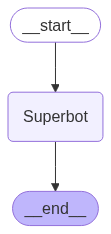

In [34]:
graph = StateGraph(State)

graph.add_node("Superbot", superbot)

graph.add_edge(START, "Superbot")
graph.add_edge("Superbot", END)

workflow = graph.compile(checkpointer=memory)
workflow

In [35]:
# creating a thread:
config = {"configurable": {"thread_id": "2"}}

for chunk in workflow.stream({"messages": "Hi I am Sourin2, what is the latest news about Neuralink"}, config=config, stream_mode="updates"):
    print(chunk)

{'Superbot': {'messages': [AIMessage(content='Hello Sourin2, I\'m happy to provide you with the latest news about Neuralink. \n\nNeuralink is a neurotechnology company founded by Elon Musk in 2016. The company\'s primary goal is to integrate the human brain with computers, aiming to enhance cognitive abilities, treat medical conditions, and potentially achieve a symbiosis between humans and artificial intelligence.\n\nHere are some recent updates about Neuralink:\n\n1. **Human Trials**: Neuralink has been conducting human trials for its brain-machine interface (BMI) technology. In 2022, the company received FDA approval to begin human clinical trials for its N1 Sensor, which is a small implantable device that can read and write neural signals.\n\n2. **N1 Sensor**: The N1 Sensor is a key component of Neuralink\'s technology. It\'s a small, flexible implant that can be inserted into the brain to read and write neural signals. The device is designed to be minimally invasive and can be con

In [36]:
for chunk in workflow.stream({"messages": "Hi I am Sourin2, what is the weather in NYC?"}, config=config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi I am Sourin2, what is the latest news about Neuralink', additional_kwargs={}, response_metadata={}, id='842be467-1ad8-4b8a-ac24-d597fac873d0'), AIMessage(content='Hello Sourin2, I\'m happy to provide you with the latest news about Neuralink. \n\nNeuralink is a neurotechnology company founded by Elon Musk in 2016. The company\'s primary goal is to integrate the human brain with computers, aiming to enhance cognitive abilities, treat medical conditions, and potentially achieve a symbiosis between humans and artificial intelligence.\n\nHere are some recent updates about Neuralink:\n\n1. **Human Trials**: Neuralink has been conducting human trials for its brain-machine interface (BMI) technology. In 2022, the company received FDA approval to begin human clinical trials for its N1 Sensor, which is a small implantable device that can read and write neural signals.\n\n2. **N1 Sensor**: The N1 Sensor is a key component of Neuralink\'s technology. It\'s a 

In [37]:
# creating a thread:
config = {"configurable": {"thread_id": "4"}}

for chunk in workflow.stream({"messages": "Hi I am Sourin2, I like tech"}, config=config, stream_mode="updates"):
    print(chunk)

{'Superbot': {'messages': [AIMessage(content="Nice to meet you, Sourin2. I'm happy to chat with you about tech. What specific areas of tech interest you the most? Are you into AI, machine learning, cybersecurity, or perhaps the latest gadgets and innovations?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 45, 'total_tokens': 93, 'completion_time': 1.1307104749999999, 'prompt_time': 0.00381795, 'queue_time': 0.090947683, 'total_time': 1.134528425}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c523237e5d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--2a5600f4-c22f-4940-abce-aed677c67121-0', usage_metadata={'input_tokens': 45, 'output_tokens': 48, 'total_tokens': 93})]}}


In [38]:
for chunk in workflow.stream({"messages": "I also like f1"}, config=config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi I am Sourin2, I like tech', additional_kwargs={}, response_metadata={}, id='738de975-180a-4681-82ff-3d9bb058df5b'), AIMessage(content="Nice to meet you, Sourin2. I'm happy to chat with you about tech. What specific areas of tech interest you the most? Are you into AI, machine learning, cybersecurity, or perhaps the latest gadgets and innovations?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 45, 'total_tokens': 93, 'completion_time': 1.1307104749999999, 'prompt_time': 0.00381795, 'queue_time': 0.090947683, 'total_time': 1.134528425}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c523237e5d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--2a5600f4-c22f-4940-abce-aed677c67121-0', usage_metadata={'input_tokens': 45, 'output_tokens': 48, 'total_tokens': 93}), HumanMessage(content='I also like f1', additional_kwargs={}, response_metadata={}, id='

### **astream() event:**

In [39]:
# creating a thread:
config = {"configurable": {"thread_id": "5"}}

for chunk in workflow.stream({"messages": "Hi I am Sourin2, I like tech"}, config=config, stream_mode="updates"):
    print(chunk)

{'Superbot': {'messages': [AIMessage(content="Nice to meet you, Sourin2. I'm happy to chat with you about tech. What specific areas of tech interest you the most? Are you into AI, machine learning, cybersecurity, or perhaps the latest gadgets and innovations?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 45, 'total_tokens': 93, 'completion_time': 0.084007233, 'prompt_time': 0.002300655, 'queue_time': 0.090739489, 'total_time': 0.086307888}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c523237e5d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--f4bd23da-fb17-4fa1-b8ac-f683a9190d07-0', usage_metadata={'input_tokens': 45, 'output_tokens': 48, 'total_tokens': 93})]}}


---
# **Human in the loop:**

In [51]:
import os
from typing import Annotated
from typing import TypedDict
from typing_extensions import TypedDict
from langchain_tavily import TavilySearch
from langchain.agents import tool

from langgraph.checkpoint.memory import MemorySaver
from langchain_groq import ChatGroq
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.types import Command, interrupt #for HITL

In [44]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [55]:
@tool
def human_assistance(query: str) -> str:
    """Request assistance from a human"""
    human_response = interrupt({'query': query})
    return human_response["data"]

search_tool_instance = TavilySearch(max_results=2, tavily_api_key = TAVILY_API_KEY)

tools = [search_tool_instance, human_assistance]
llm_with_tools = model.bind_tools(tools)

In [56]:
def chatbot(state: State):
    message = llm_with_tools.invoke(state['messages'])

    return {"messages": [message]}

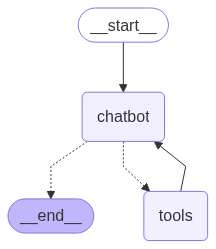

In [57]:
graph_builder = StateGraph(State)


tool_node = ToolNode(tools=tools)

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition
)

graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

memory = MemorySaver()

graph = graph_builder.compile(checkpointer=memory)

graph